# 1. 괄호
[문제 링크](https://www.acmicpc.net/problem/9012)

In [1]:
def solution(s):    
    # 문자열 길이가 홀수이거나, 첫번째 문자가 ')'이거나, 마지막 문자가 '('이면 False
    if s[0] == ')' or s[-1] == '(' or len(s) % 2 != 0:
        return False
    
    total = 0
    
    for v in s:
        if v == '(':
            total += 1
        else:
            total -= 1
        
        # ')'가 더 많아지면 False
        if total < 0:
            return False
    
    # '('와 ')'의 개수가 같지 않으면 False
    if total != 0:
        return False

    return True

n = int(input())
for _ in range(n):
    is_vps = solution(input())
    result = 'YES' if is_vps else 'NO'
    print(result)

NO


# 성공
- 프로그래머스에서 풀었던 문제와 비슷.
- 프로그래머스의 코드를 재활용.
- 스택을 쓰지 않아도 간편한 문제.
- 스택을 활용 하는 방식으로 다시시도 해봐야 할듯함.

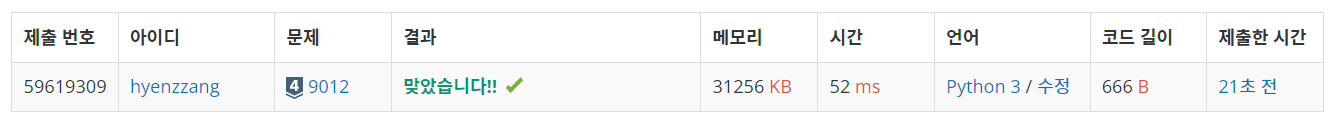

In [ ]:
def solution(s):    
    # 문자열 길이가 홀수이거나, 첫번째 문자가 ')'이거나, 마지막 문자가 '('이면 False
    if s[0] == ')' or s[-1] == '(' or len(s) % 2 != 0:
        return False
    
    stack = []
    
    for v in s:
        if v == '(':        # '('이면 스택에 넣음
            stack.append(v)
        else:               # ')'이면 스택에서 '('를 빼냄
            try:
                stack.pop()
            except:             # 스택이 비어있으면 False
                return False
    
    # '('가 남아있으면 False
    if len(stack) != 0:
        return False

    return True

n = int(input())
for _ in range(n):
    is_vps = solution(input())
    result = 'YES' if is_vps else 'NO'
    print(result)

# 성공
- 스택을 활용 하는 방식으로 다시시도

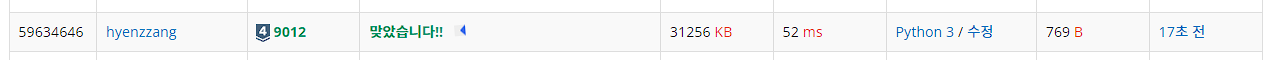

# 2. 크레인 인형뽑기 게임
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/64061)

In [1]:
# 뽑은 인형을 담을 바구니를 저장할 전역 변수
basket = []
# 인형이 담긴 보드를 저장할 전역 변수
board = []
# 사라진 인형의 개수를 저장할 전역 변수
count = 0

# 인혈을 받아서 바구니에 담는 함수
def put_in_basket(doll):
    global basket
    global count
    
    if len(basket) >= 1 :   # 바구니의 길이가 1 이상일 경우
        if basket[-1] == doll:  # 바구니의 마지막 인형과 받은 인형이 같은지 확인
            basket.pop()        # 같으면 바구니의 마지막 인형을 빼냄
            count += 2          # 사라진 인형의 개수를 2개 늘림
            return 
    
    # 바구니에 인형을 담음
    basket.append(doll)

# 인형을 뽑는 함수
def doll_drawing(m):
    global board
    for i in range(len(board)): # 배열의 맨 윗줄부터 탐색
        if board[i][m] != 0:        # 인형이 있는 경우
            doll = board[i][m]      # 인형을 뽑음
            board[i][m] = 0         # 인형이 있던 자리를 0으로 바꿈
            put_in_basket(doll)     # 인형을 바구니에 담음
            break

# 보드를 전역 변수로 저장
def set_board(_board):
    global board
    board = _board

def solution(board, moves):
    global count
    set_board(board)
    for move in moves:
        doll_drawing(move-1)
    return count

# 성공
- 스택 개념을 활용하여 풀이.

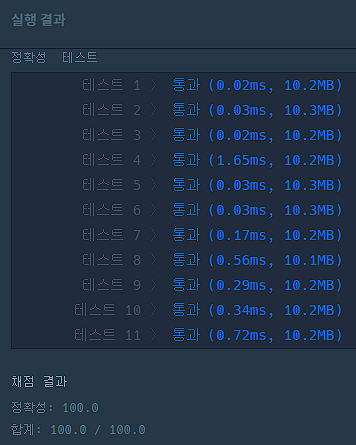

# 3. 카드2
[문제 링크](https://www.acmicpc.net/problem/2164)

In [7]:
n = int(input())  # 카드의 갯수를 입력받음
# 카드를 저장할 오름차순의 큐 생성
card_qu = [ i for i in range(1, n+1)] 
while len(card_qu) != 1:    # 카드가 한 장 남을 때까지 반복
    card_qu.pop(0)                  # 맨 위의 카드를 버림
    card_qu.append(card_qu.pop(0))  # 맨 위의 카드를 맨 아래로 옮김
print(card_qu[0])   # 남은 카드 출력

36


# 실패
- 리스트를 간단하게 큐로 사용할 경우의 문제인듯하다.
- list.pop(0)의 과정에서의 복잡도가 O(n)인듯.
- 즉 전체 복잡도가 n^2이 된듯함.

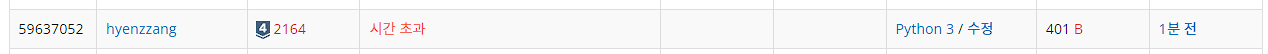

In [9]:
from collections import deque # 큐를 사용하기 위해 deque를 import

n = int(input())  # 카드의 갯수를 입력받음
# 카드를 저장할 오름차순의 큐 생성
card_qu = deque(list(range(1, n+1)))
while len(card_qu) != 1:    # 카드가 한 장 남을 때까지 반복
    card_qu.popleft()                  # 맨 위의 카드를 버림
    card_qu.append(card_qu.popleft())  # 맨 위의 카드를 맨 아래로 옮김
print(card_qu[0])   # 남은 카드 출력

4


# 성공
- collection 모듈에서 deque를 임포트함.
- list.popleft()에서의 시간복잡도는 O(1)
- 성능적 측면에서 훨씬 좋음

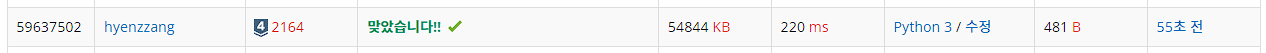

# 4. 프린터
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/42587)

In [11]:
from collections import deque

def solution(priorities, location):
    count = 0  # 출력된 문서의 개수를 저장할 변수
    n = len(priorities)
    # 큐에 문서의 인덱스와 우선순위를 저장
    print_qu = deque([ [i , priorities[i]] for i in range(n)])
    # 큐가 빌 때까지 반복
    while len(print_qu) != 0:
        # 큐에서 문서를 pop
        doc = print_qu.popleft()
        # 큐에 문서가 남아있을 경우, 뽑은 문서보다 우선순위가 높은 문서가 있는지 확인
        if len(print_qu) != 0: 
            if max(print_qu, key=lambda x: x[1])[1] > doc[1]:
                print_qu.append(doc)    # 큐의 맨 뒤에 뽑은 문서를 추가
                continue                # 다음 문서를 pop하기 위해 반복문의 처음으로 이동
        
        # 조건에 해당하지 않을 경우, 출력된 문서의 개수를 1 증가    
        count += 1
        
        if doc[0] == location:  # 뽑은 문서가 찾는 문서일 경우
            return count

# 성공
- 시작시 인덱스와 중요도를 합쳐서 큐에 저장함.
- 언제 뽑히는지 궁금한 문서를 추적 가능했음.
- 리스트의 형태로 큐에 들어가 있기 때문에, max에 람다식을 전달함.

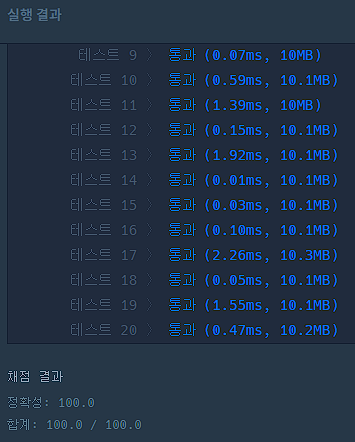